## Project Case Scenario - Statistics for Data Science with Python

This project is the final evaluation of Statistics for Data Science with Python course. The dataset variables for this exercise are exposed below:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000$
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's$

That said, let's import our dataset

In [8]:
#Loading dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 4: Generate Descriptive Statistics and Visualizations

- For the "Median value of owner-occupied homes" provide a boxplot


                     Box Plot of Age


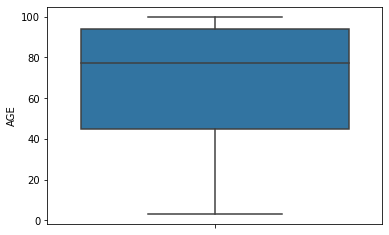

In [125]:
print()
print('                     Box Plot of Age')
ax = sns.boxplot(y='AGE', data=boston_df)

- Provide a  histogram for the Charles river variable


               Histogram of Charles river variable


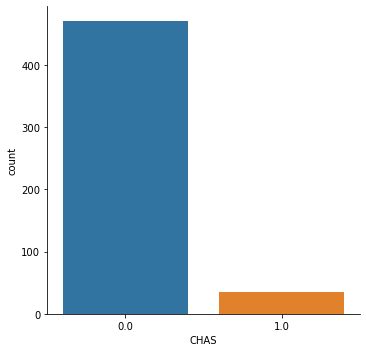

In [133]:
#Provide a histogram for the Charles river variable
print()
print('               Histogram of Charles river variable')
sns.catplot(x='CHAS', kind='count', data=boston_df)

- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


                             Box Plot of clusters of Age


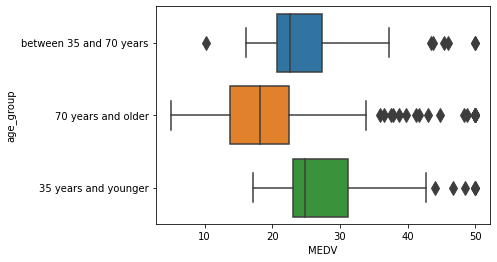

In [144]:
#Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

#Provide a boxplot for the MEDV variable vs the AGE variable. 

cont_table  = pd.crosstab(boston_df['MEDV'], boston_df['age_group'])
cont_table.head()

print('')
print('                             Box Plot of clusters of Age')
ax = sns.boxplot(x="MEDV", y="age_group",data=boston_df,fliersize=10)

- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

(0.7636514469209154, 7.913361061236894e-98)

  Scatter Plot of Nitric oxide concentration x Non-Retail business per town



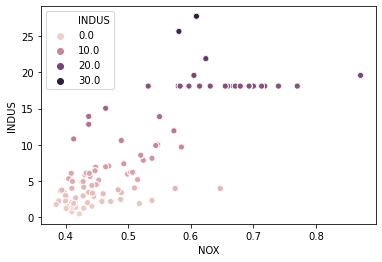

In [168]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
#What can you say about the relationship?

print(scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS']))
print('')
print('  Scatter Plot of Nitric oxide concentration x Non-Retail business per town')
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df, hue="INDUS")
print('')

In [170]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209154, 7.913361061236894e-98)

**Conclusion:** p < 0.05 there is evidence of correlation between Nitric oxide concentration and Non-Retail business per town. However, since r = 0.76, this correlation is positive and not strong.

- Create a histogram for the pupil to teacher ratio variable

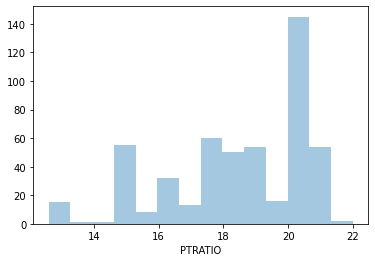

In [66]:
#Create a histogram for the pupil to teacher ratio variable

#sns.catplot(x='PTRATIO', kind='count', data=boston_df, height = 3, aspect = 2)

ax = sns.distplot(boston_df['PTRATIO'], kde = False)

## Task 5: Use the appropriate tests to answer the questions provided.

For each of the following questions;

1) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

2) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

3) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

4) What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


Be sure to:
- State your hypothesis;
- Use α = 0.05;
- Perform the test Statistics;
- State the conclusion from the test.

### 1) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

-   One independent, categorical variable with two levels or group
-   One dependent continuous variable
-   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
-   The dependent variable must follow a normal distribution
-   Assumption of homogeneity of variance

State the hypothesis

-   $H_0: µ_1 = µ_2$ ("there is no difference in median valuesof houses bounded by Charles river")
-   $H_1: µ_1 ≠ µ_2$ ("there is a difference in median valuesof houses bounded by Charles river")

We can plot the dependent variable with a historgram

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

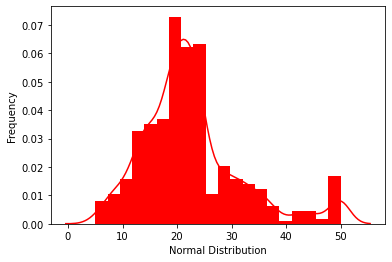

In [89]:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
## we can assume it is normal

Use the <code>ttest_ind</code> from the <code>scipy_stats</code> library

In [91]:
import scipy.stats
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in value price based on river evaluations based on Charles river boundaries.

### 2) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)'

Since we already have the groups defined, let's state the hypothesis

-   $H_0: µ_1 = µ_2 = µ_3$ (the three population medians are equal)
-   $H_1:$ At least one of the median differ

Test for equality of variance

In [104]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'


scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the p-value is greater than 0.05, we fail to reject null hypothesis as there is no evidence of an association between age and median values of houses

### 3) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

-   $H_0:$ Nitric oxide concentration and proportions is not correlated with non-retail business acres per town
-   $H_1:$ Nitric oxide concentration and proportions is correlated with non-retail business acres per town

Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot

(0.7636514469209154, 7.913361061236894e-98)

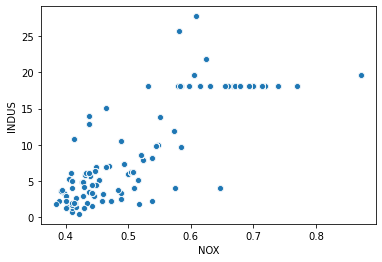

In [107]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

### 4) What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [108]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

#### Regression with ANOVA

Stating the null hypothesis:

-  $H_0$: Additional weighted distance has no impact on median value of owner homes
-  $H_1$: Additional weighted distance has an impact on median value of owner homes


DIS
MEDV

In [110]:
from statsmodels.formula.api import ols
lm = ols('DIS ~ MEDV', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

             df       sum_sq     mean_sq         F        PR(>F)
MEDV        1.0   139.868826  139.868826  33.57957  1.206612e-08
Residual  504.0  2099.308819    4.165295       NaN           NaN


**Conclusion:** We will reject the null hypothesis since the p-value is less than 0.05 there is significant evidence that at least one of weight distance has impact on owner homes.


#### Correlation

In [114]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 31 Dec 2020   Prob (F-statistic):           1.21e-08
Time:                        01:24:16   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p < 0.05 there is evidence of correlation between weighted distance and value of homes.
